In [26]:
function golden_section_search_method(func, xl, xu, es=1e-5, max_iter=10000,maximize=true)
    phi = (sqrt(5) - 1) / 2

    if !maximize
        func = x -> func(x)
    end

    d = phi * (xu - xl)
    x1 = xl + d
    x2 = xu - d

    iter_count = 0
    errors = Float64[]
    ea = 100.0

    while ea > es && iter_count < max_iter
        if func(x1) > func(x2)
            x1, x2 = x2, x1
            d = phi * (xu - xl)
            xl = xl + d
        else
            xu, xl = x1, x2
            d = phi * (xu - xl)
            x2 = xu - d
        end

        ea = abs((xu - xl) / (xu + xl) * 100)
        push!(errors, ea)

        iter_count += 1
    end

    func(xl) > func(x2) ? x_opt = x1 : x_opt = x2

    return x_opt, iter_count, errors
end

golden_section_search_method (generic function with 4 methods)

In [27]:
function parabolic_interpolation_method(f, x0, x1, x2, es = 1e-5, max_iter=10000, maximize = true)
    errors = Float64[]
    iter_count = 0
    x3 = 0.0
    ea = 100.0
    tol = 1e-12

    if !maximize
        f = x -> -f(x)
    end

    while ea > es && iter_count < max_iter
        numerator = f(x0) * (xl^2 -x2^2) + f(xl) * (x2^2 - x0^2) + f(x2) * (x0^2 - x1^2)
        denominator = 2 * (f(x0) * (x1 - x2) + f(x1) * (x2 - x0) + f(x2) * (x0 - x1))
        
        if abs(denominator) < tol
            println("denominator close to zero, Stopping iteration.")
            break
        end

        x3 = numerator/denominator

        ea = abs((x3 - x1) / (x3 + tol))
        push!(errors, ea)

        if x3 > x1
            x0, x1, x3 = x1, x3, x2
        else
            x0, x1, x2 = x0, x3, x1
        end

        iter_count += 1
    end
    return x3, iter_count, errors
    
end

parabolic_interpolation_method (generic function with 4 methods)

In [28]:
function newton_method(f1d, f2d, xi, es=1e-5, max_iter=10000)
    errors = Float64[]
    iter_count = 0
    ea = 100.0

    while ea > es && iter_count < max_iter
        old_xi = xi
        xi = xi - f1d(xi)/f2d(xi)
        iter_count += 1

        ea = abs((xi - old_xi)/xi) * 100
        push!(errors, ea)
    end
    return xi, iter_count, errors
end

newton_method (generic function with 3 methods)

A4 paper is 21.0 $\times$ 29.7 cm \
if cut its four corners to form a box \
so the equation is $V(x) = x(29.7-2x)(21.0 -2x) = 4x^2-101.4x^2+623.7x$

In [29]:
f(x) = 4*x^3 - 101.4*x^2 + 623.7*x
f1d(x) = 12*x^2-202.8*x + 623.7
f2d(x) = 24*x - 202.8
x0 = 4

x_n, iterations_n, errors_n = newton_method(f1d, f2d, x0)

f_n = f(x_n)

println("Optimal x : $x_n")
println("Optimal f(x) : $f_n")
println("Iterations : $iterations_n")
print("Errors : $errors_n")

Optimal x : 4.042336219719115
Optimal f(x) : 1128.4951047312557
Iterations : 3
Errors : [1.0423905489923624, 0.004981863139745596, 1.1380930120303732e-7]

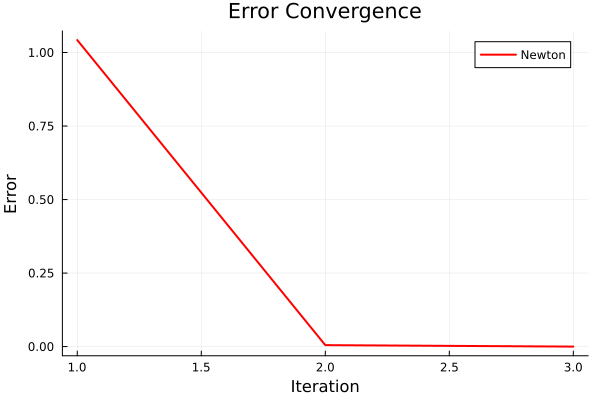

In [30]:
using Plots
plot(1 : iterations_n, errors_n, xlabel="Iteration", ylabel = "Error", title = "Error Convergence", lw = 2, color =:red, label="Newton")